In [19]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('Heart.csv') # Read in the data
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
df['ChestPain'].unique() # Find out all the unique values in this column because it's non-numerical

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

In [5]:
df['Thal'].unique() # Doing same thing as above

array(['fixed', 'normal', 'reversable', nan], dtype=object)

In [6]:
df = df.dropna() # Dropping empty data

In [21]:
# Converting all the non-numerical values into numerical values
df["ChestPainx"]= df.ChestPain.replace({"typical": 1, "asymptomatic": 2, "nonanginal": 3, "nontypical": 4})
df["Thalx"] = df.Thal.replace({"fixed": 1, "normal":2, "reversable":3})
df["AHD"] = df.AHD.replace({"Yes": 1, "No":0})

In [22]:
df = pd.concat([pd.Series(1, index = df.index, name = '00'), df], axis=1)
df.head() # Adding new columns with numerical values

,00,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ChestPainx,Thalx
0,1,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0,1,1.0
1,1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1,2,2.0
2,1,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1,2,3.0
3,1,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0,3,2.0
4,1,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0,4,2.0


In [23]:
X = df.drop(columns=["Unnamed: 0", "ChestPain", "Thal"])
X.head() # removing old columns with non-numerical values

,00,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPainx,Thalx
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0,0,1,1.0
1,1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,2,2.0
2,1,67,1,120,229,0,2,129,1,2.6,2,2.0,1,2,3.0
3,1,37,1,130,250,0,0,187,0,3.5,3,0.0,0,3,2.0
4,1,41,0,130,204,0,2,172,0,1.4,1,0.0,0,4,2.0


In [25]:
y= df["AHD"] # Setting our desired output category to y
y.head()

0    0
1    1
2    1
3    0
4    0
Name: AHD, dtype: int64

In [26]:
theta = [0.5]*len(X.columns)
theta # Randomly initializing theta

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

In [31]:
def hypothesis(X, theta): # Using the formula for the hypothesis function
    z = np.dot(theta, X.T)
    return 1/(1+np.exp(-(z))) - 0.0000001
    # Subtracting a value just incase our hypothesis is 1 cause log 0 ain't defined

In [32]:
def cost(X, y, theta): # Straight forward implementation of the cost function
    y1 = hypothesis(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

In [33]:
def gradient_descent(X, y, theta, alpha, epochs): 
    m = len(X) # Getting the length of our training data
    J = [cost(X, y, theta)]  # Cost values at each step
    for i in range(0, epochs): # for our training time
        h = hypothesis(X, theta) # Getting our hypothesis prediction for specific theta
        for i in range(0, len(X.columns)): # Calculating theta for each of our columns using the formula
            theta[i] -= (alpha/m) * np.sum((h-y)*X.iloc[:, i])
        J.append(cost(X, y, theta)) # Storing our cost value for each iteration
    return J, theta # Getting final theta and cost for iteration

In [34]:
L, theta = gradient_descent(X, y, theta, 0.03, 2)

<ipython-input-31-5a1c0e1f900c>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-(z))) - 0.0000001
<ipython-input-32-18646a71246e>:3: RuntimeWarning: invalid value encountered in log
  return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))


In [35]:
def predict(X, y, theta, alpha, epochs): # Our main training function
    J, th = gradient_descent(X, y, theta, alpha, epochs) # Train our model
    h = hypothesis(X, th) # Find prediction for each X
    for i in range(len(h)):
        h[i]=1 if h[i]>=0.5 else 0
    y = list(y)
    acc = np.sum([y[i] == h[i] for i in range(len(y))])/len(y)
    return J, acc # Calculate our training accuracy

In [36]:
predict(X, y, theta, 0.03, 3)

<ipython-input-32-18646a71246e>:3: RuntimeWarning: invalid value encountered in log
  return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))
<ipython-input-31-5a1c0e1f900c>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-(z))) - 0.0000001


([8.511205669760889, -0.0, 8.511205669760889, -0.0], 0.5412541254125413)

In [37]:
theta = [0.5]*len(X.columns)
J, acc = predict(X, y, theta, 0.01, 20000)

<ipython-input-32-18646a71246e>:3: RuntimeWarning: invalid value encountered in log
  return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))
<ipython-input-31-5a1c0e1f900c>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-(z))) - 0.0000001


In [29]:
acc

0.6666666666666666

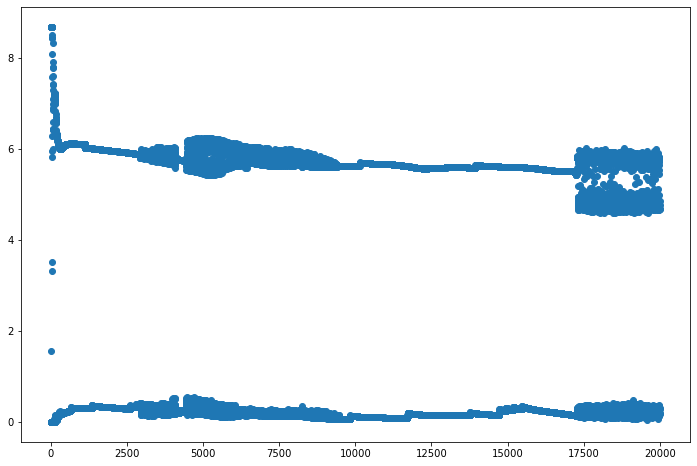

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.show()

In [31]:
theta = [0.5]*len(X.columns)
J, acc = predict(X, y, theta, 0.0005, 5000)

<ipython-input-12-c628e63b1d36>:3: RuntimeWarning: invalid value encountered in log
  return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))


In [32]:
acc

0.6127946127946128

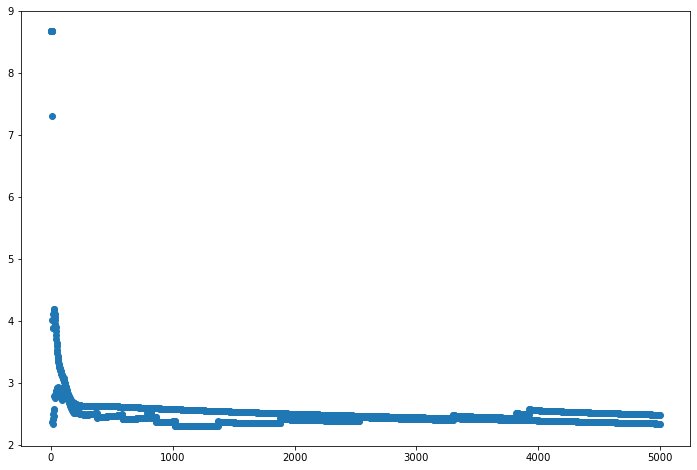

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.show()

In [34]:
theta = [0.5]*len(X.columns)
J, acc = predict(X, y, theta, 0.0001, 15000)

<ipython-input-12-c628e63b1d36>:3: RuntimeWarning: invalid value encountered in log
  return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))


In [35]:
acc

0.8316498316498316

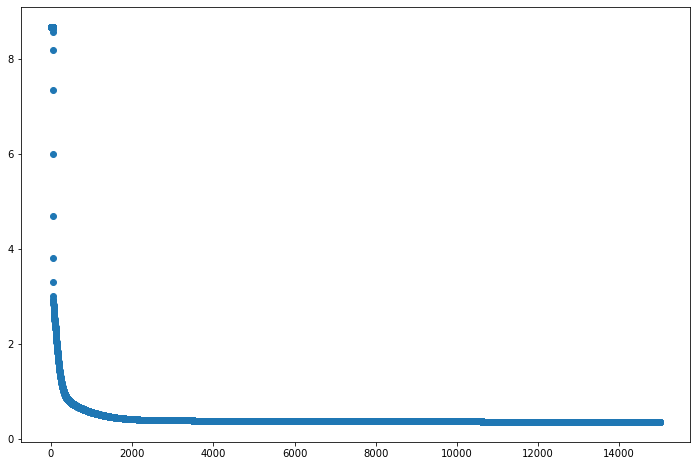

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.show()

In [37]:
theta = [0.5]*len(X.columns)
J, acc = predict(X, y, theta, 0.0001, 20000)

<ipython-input-12-c628e63b1d36>:3: RuntimeWarning: invalid value encountered in log
  return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))


In [38]:
acc

0.8417508417508418

In [39]:
theta = [0.5]*len(X.columns)
J, acc = predict(X, y, theta, 0.0001, 25000)

<ipython-input-12-c628e63b1d36>:3: RuntimeWarning: invalid value encountered in log
  return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))


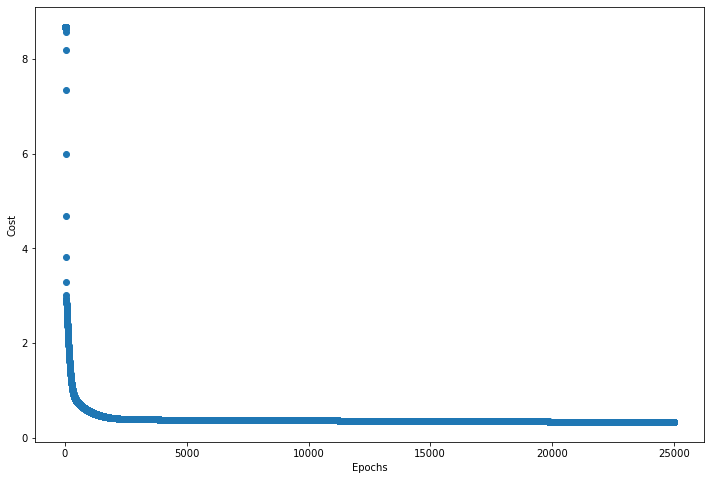

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

In [41]:
acc

0.8484848484848485

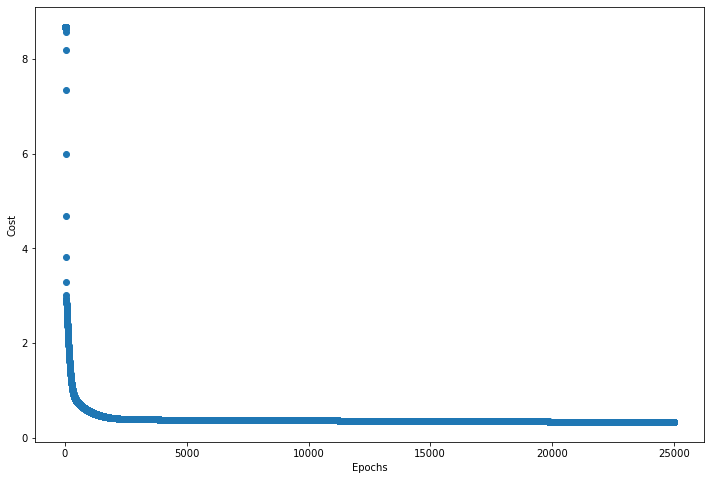

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

In [43]:
theta = [0.5]*len(X.columns)
J, acc = predict(X, y, theta, 0.0001, 5000)

<ipython-input-12-c628e63b1d36>:3: RuntimeWarning: invalid value encountered in log
  return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))


In [44]:
acc

0.8181818181818182